# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

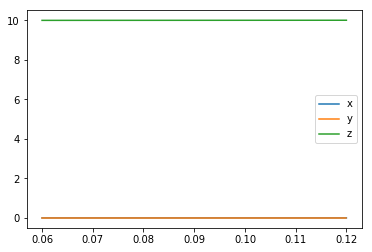

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

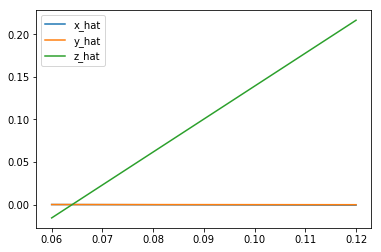

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

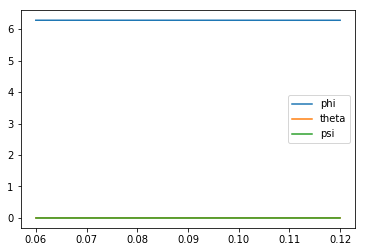

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

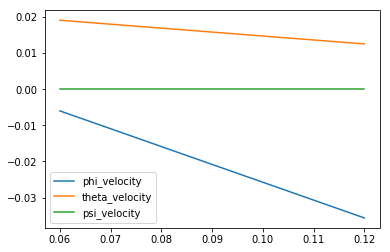

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

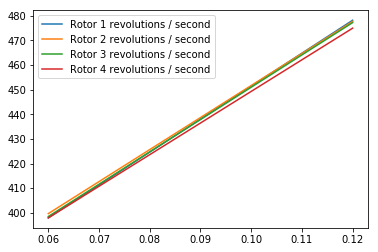

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.86008375e-05 -4.77845197e-06  1.00055486e+01  6.28226437e+00
  1.46233876e-03  0.00000000e+00]
[-7.01660106e-04 -2.12954307e-04  2.16393311e-01]
[-0.03561406  0.01251946  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [281]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
ps_agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = ps_agent.reset_episode() # start a new episode
    while True:
        action = ps_agent.act(state) 
        next_state, reward, done = task.step(action)
        ps_agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, ps_agent.score, ps_agent.best_score, ps_agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: 'NoneType' object is not subscriptable

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

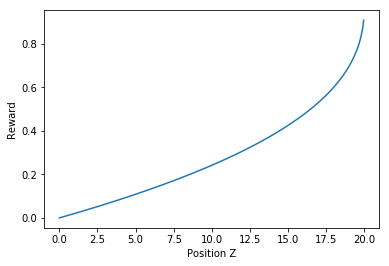

In [277]:
import math 
import matplotlib.pyplot as plt
%matplotlib inline

reward_function_z = lambda pose, target_pos: 1. - (np.abs(target_pos - pose) / 20.) **0.4

values = np.arange(0., 20., 0.05)
target_pos = 20.

plt.plot(values, reward_function_z(values, target_pos))
plt.xlabel("Position Z")
plt.ylabel("Reward")
plt.show()


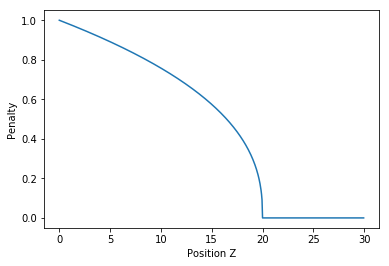

In [273]:
getting_lower_penalty = lambda pose, initial_pos:(abs(min(pose - initial_pos, 0))/initial_pos)**0.4
values = np.arange(0., 30., 0.05)
initial_pos = 20.

penalties = [getting_lower_penalty(p, initial_pos) for p in values]
plt.plot(values, penalties)
plt.xlabel("Position Z")
plt.ylabel("Penalty")
plt.show()


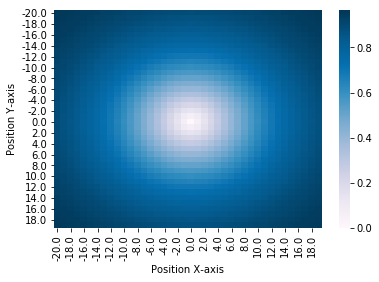

In [173]:
import seaborn as sns
%matplotlib inline


def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R


eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
tolerable_xy_dev = eucl_distance([0., 0.], [10., 10.])
penalty_function_xy = lambda pose, target_pos: np.tanh(eucl_distance(pose, target_pos) / tolerable_xy_dev)

x_range = np.round(np.arange(-20., 20., 1), 2)
y_range = np.round(np.arange(-20., 20., 1), 2)
target_pos = np.array([0., 0.])

R = map_function(penalty_function_xy, x_range, y_range, target_pos)

ax = sns.heatmap(R, cmap="PuBu")
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Y-axis")
plt.show()


In [284]:
from agents.agent import DDPG
from monitor import interact

init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 30.])

num_trials = 500
task = Task(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
agent = DDPG(task)


episode_rewards, best_reward = interact(task, agent, num_trials)

Episode 1/500 || Reward -576.3723592623944 || Best reward -576.3723592623944 
Quadcopter pose [-1.07228298 -3.36401474  0.        ]
Episode 2/500 || Reward -676.6687778132657 || Best reward -576.3723592623944 
Quadcopter pose [-1.1079037  -3.28377792  0.        ]
Episode 3/500 || Reward -575.7948817002446 || Best reward -575.7948817002446 
Quadcopter pose [-1.08279187 -3.21831245  0.        ]
Episode 4/500 || Reward -676.2252377346308 || Best reward -575.7948817002446 
Quadcopter pose [-1.11027189 -3.16290593  0.        ]
Episode 5/500 || Reward -570.2089548253743 || Best reward -570.2089548253743 
Quadcopter pose [-1.30495455  0.0623593   0.        ]
Episode 6/500 || Reward -687.5505093454467 || Best reward -570.2089548253743 
Quadcopter pose [-0.03480992  4.98882159  0.        ]
Episode 7/500 || Reward -690.9110786601503 || Best reward -570.2089548253743 
Quadcopter pose [ 0.36465434 -0.78776799  0.        ]
Episode 8/500 || Reward -472.99135191721854 || Best reward -472.991351917218

Episode 63/500 || Reward -390.3154506993737 || Best reward -376.69439621730834 
Quadcopter pose [-0.38438091  2.67462771  0.        ]
Episode 64/500 || Reward -388.83379223362505 || Best reward -376.69439621730834 
Quadcopter pose [-0.35708694  2.64497493  0.        ]
Episode 65/500 || Reward -387.6032127116109 || Best reward -376.69439621730834 
Quadcopter pose [-0.41473355  2.5600793   0.        ]
Episode 66/500 || Reward -390.20018561504025 || Best reward -376.69439621730834 
Quadcopter pose [-0.40297863  2.62818081  0.        ]
Episode 67/500 || Reward -389.2720266883592 || Best reward -376.69439621730834 
Quadcopter pose [-0.42381576  2.5765122   0.        ]
Episode 68/500 || Reward -387.38379623958275 || Best reward -376.69439621730834 
Quadcopter pose [-0.4757503   2.51503547  0.        ]
Episode 69/500 || Reward -389.47627059856785 || Best reward -376.69439621730834 
Quadcopter pose [-0.63244925  2.53272829  0.        ]
Episode 70/500 || Reward -393.85720189347836 || Best rewar

Episode 124/500 || Reward -486.21046786177794 || Best reward -376.69439621730834 
Quadcopter pose [-0.01076895  2.84047972  0.        ]
Episode 125/500 || Reward -486.23118889258285 || Best reward -376.69439621730834 
Quadcopter pose [-0.11507152  2.85903758  0.        ]
Episode 126/500 || Reward -485.74706891290185 || Best reward -376.69439621730834 
Quadcopter pose [-0.17521405  2.81390004  0.        ]
Episode 127/500 || Reward -492.31196550975403 || Best reward -376.69439621730834 
Quadcopter pose [-0.19291179  2.8672781   0.        ]
Episode 128/500 || Reward -508.87978363130225 || Best reward -376.69439621730834 
Quadcopter pose [-2.7390142   2.92305903  0.        ]
Episode 129/500 || Reward -585.5782595124596 || Best reward -376.69439621730834 
Quadcopter pose [-0.02060852  2.88267123  0.        ]
Episode 130/500 || Reward -484.3050699297919 || Best reward -376.69439621730834 
Quadcopter pose [-0.01975319  2.85548258  0.        ]
Episode 131/500 || Reward -482.56031312886887 || B

Episode 185/500 || Reward -522.2510097491606 || Best reward -376.69439621730834 
Quadcopter pose [-5.14104343  2.79655377  0.        ]
Episode 186/500 || Reward -521.5047377971598 || Best reward -376.69439621730834 
Quadcopter pose [-4.81682036  2.8437208   0.        ]
Episode 187/500 || Reward -419.70583068525286 || Best reward -376.69439621730834 
Quadcopter pose [-5.12788054  2.72975489  0.        ]
Episode 188/500 || Reward -522.230996862897 || Best reward -376.69439621730834 
Quadcopter pose [-4.8501746  2.8621394  0.       ]
Episode 189/500 || Reward -519.0055911870697 || Best reward -376.69439621730834 
Quadcopter pose [-4.41075277  2.92323275  0.        ]
Episode 190/500 || Reward -410.00638683049624 || Best reward -376.69439621730834 
Quadcopter pose [-3.56095123  2.79185371  0.        ]
Episode 191/500 || Reward -509.7219852217652 || Best reward -376.69439621730834 
Quadcopter pose [-3.42705996  2.83433333  0.        ]
Episode 192/500 || Reward -504.97506893691485 || Best rew

Episode 246/500 || Reward -582.4501362160103 || Best reward -376.69439621730834 
Quadcopter pose [-0.04714889  2.84741068  0.        ]
Episode 247/500 || Reward -583.4432950334885 || Best reward -376.69439621730834 
Quadcopter pose [-0.03794873  2.87601675  0.        ]
Episode 248/500 || Reward -583.2106182727146 || Best reward -376.69439621730834 
Quadcopter pose [-0.03639979  2.88767512  0.        ]
Episode 249/500 || Reward -583.1299440484954 || Best reward -376.69439621730834 
Quadcopter pose [-0.03336923  2.88023014  0.        ]
Episode 250/500 || Reward -583.4627555015509 || Best reward -376.69439621730834 
Quadcopter pose [-0.04134637  2.90490235  0.        ]
Episode 251/500 || Reward -582.9654186452834 || Best reward -376.69439621730834 
Quadcopter pose [-0.03870688  2.867773    0.        ]
Episode 252/500 || Reward -584.6831362327265 || Best reward -376.69439621730834 
Quadcopter pose [-0.05745564  2.91039655  0.        ]
Episode 253/500 || Reward -482.1025567911045 || Best re

Episode 306/500 || Reward -582.5909322968778 || Best reward -376.69439621730834 
Quadcopter pose [-0.00458494  2.89254568  0.        ]
Episode 307/500 || Reward -480.46426447135445 || Best reward -376.69439621730834 
Quadcopter pose [-0.00313792  2.84992054  0.        ]
Episode 308/500 || Reward -481.12608122805307 || Best reward -376.69439621730834 
Quadcopter pose [-1.94698037e-03  2.86909439e+00  0.00000000e+00]
Episode 309/500 || Reward -481.5889802657039 || Best reward -376.69439621730834 
Quadcopter pose [-1.42278387e-03  2.87149182e+00  0.00000000e+00]
Episode 310/500 || Reward -582.823732238704 || Best reward -376.69439621730834 
Quadcopter pose [-2.86358308e-03  2.89688394e+00  0.00000000e+00]
Episode 311/500 || Reward -481.0002956406458 || Best reward -376.69439621730834 
Quadcopter pose [-0.00471492  2.83551633  0.        ]
Episode 312/500 || Reward -480.66967246351135 || Best reward -376.69439621730834 
Quadcopter pose [-0.00622835  2.8343831   0.        ]
Episode 313/500 |

Episode 366/500 || Reward 2659.134362321876 || Best reward 2659.134362321876 
Quadcopter pose [-14.59554816 -25.30276636  16.12431552]
Episode 367/500 || Reward -452.7766738965655 || Best reward 2659.134362321876 
Quadcopter pose [-0.96806304  0.66349318  0.        ]
Episode 368/500 || Reward -503.6278602191864 || Best reward 2659.134362321876 
Quadcopter pose [-8.00954606 -0.3926411   0.        ]
Episode 369/500 || Reward -625.1966248205998 || Best reward 2659.134362321876 
Quadcopter pose [2.18882355 0.10390205 0.        ]
Episode 370/500 || Reward -411.43147228561634 || Best reward 2659.134362321876 
Quadcopter pose [0.1246169  0.58238706 0.        ]
Episode 371/500 || Reward -618.7950308296054 || Best reward 2659.134362321876 
Quadcopter pose [ 5.93468747 -0.19711083  0.        ]
Episode 372/500 || Reward -676.4063485539464 || Best reward 2659.134362321876 
Quadcopter pose [ 6.02077981 -2.25106705  0.        ]
Episode 373/500 || Reward -635.863363584413 || Best reward 2659.13436232

Episode 426/500 || Reward 3068.0352923204914 || Best reward 3454.281661665284 
Quadcopter pose [ 1.50480782e-03 -4.75065194e+01  6.33238607e+01]
Episode 427/500 || Reward 3283.799887510974 || Best reward 3454.281661665284 
Quadcopter pose [-4.36062984e-03 -1.23884177e+01  9.44139696e+01]
Episode 428/500 || Reward 3214.3869933006745 || Best reward 3454.281661665284 
Quadcopter pose [-1.79821363e-02 -3.21517858e+01  8.61250994e+01]
Episode 429/500 || Reward 3055.305513508605 || Best reward 3454.281661665284 
Quadcopter pose [ 1.15721014e-03 -4.64460539e+01  7.24135738e+01]
Episode 430/500 || Reward 3420.7956490321235 || Best reward 3454.281661665284 
Quadcopter pose [-6.10323992e-03  7.02766465e+00  9.23077404e+01]
Episode 431/500 || Reward 3136.9805460129355 || Best reward 3454.281661665284 
Quadcopter pose [ 2.46190398e-03 -9.11048381e+00  9.05993289e+01]
Episode 432/500 || Reward 3251.3550737204528 || Best reward 3454.281661665284 
Quadcopter pose [-5.20184553e-03 -6.17469908e+00  9.9

Episode 483/500 || Reward 3218.7510650346326 || Best reward 3489.8247378954134 
Quadcopter pose [-1.30639829e-03  3.50808852e+01  8.10346500e+01]
Episode 484/500 || Reward 3365.6420025547445 || Best reward 3489.8247378954134 
Quadcopter pose [-5.23083502e-03  1.74151392e+01  9.13389121e+01]
Episode 485/500 || Reward 2983.203527163415 || Best reward 3489.8247378954134 
Quadcopter pose [ 9.14237781e-03 -5.44313548e+01  7.07634420e+01]
Episode 486/500 || Reward 3069.865354519547 || Best reward 3489.8247378954134 
Quadcopter pose [ 7.01717684e-03 -6.62277039e+01  4.14848790e+01]
Episode 487/500 || Reward 3298.8628991183323 || Best reward 3489.8247378954134 
Quadcopter pose [-9.19403968e-03 -6.11868140e+01  4.51486358e+01]
Episode 488/500 || Reward 3331.7781979159877 || Best reward 3489.8247378954134 
Quadcopter pose [-1.55514623e-02  3.63625457e+01  7.98087978e+01]
Episode 489/500 || Reward 3286.49532131176 || Best reward 3489.8247378954134 
Quadcopter pose [-6.42880468e-03 -5.89171068e+01

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

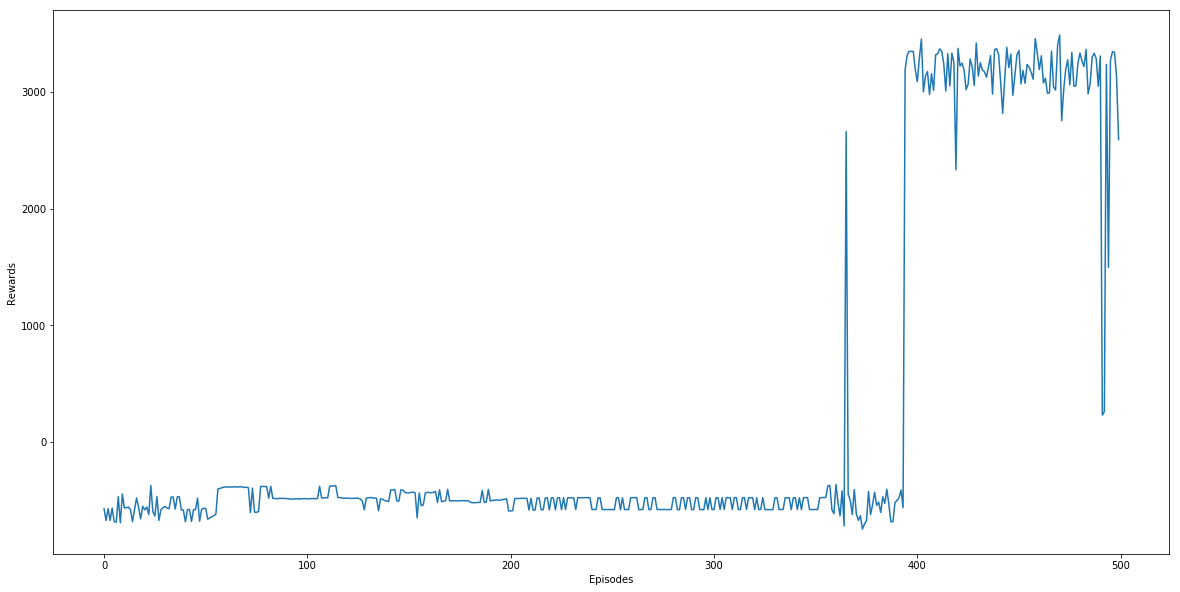

In [285]:
from monitor import *

plot_rewards(episode_rewards)

## Run sample eposide and observe agent's behavior

In [ ]:
from monitor import run_sample_task

runtime=5.
init_velocities = np.array([0., 0., 0.])        
init_angle_velocities = np.array([0., 0., 0.])  
init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 30.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)

results = run_sample_task(agent, task)


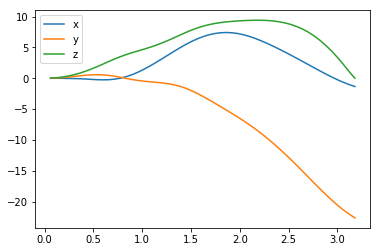

In [228]:
from monitor import plot_position

plot_position(results)

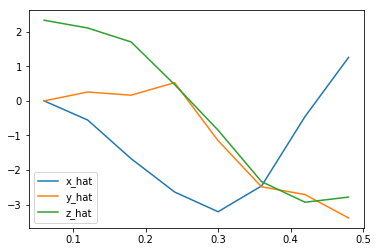

In [124]:
from monitor import plot_velocity

plot_velocity(results)

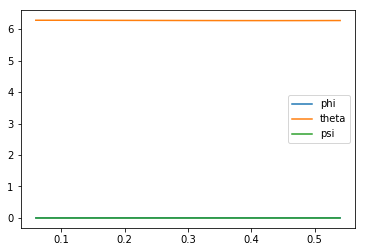

In [104]:
from monitor import plot_euler_angles

plot_euler_angles(results)

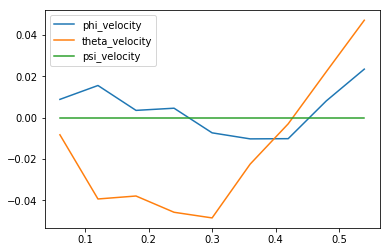

In [105]:
from monitor import plot_euler_angles_velocities

plot_euler_angles_velocities(results)

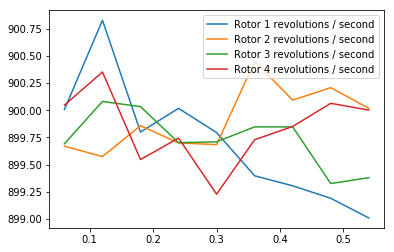

In [106]:
from monitor import plot_choice_of_actions

plot_choice_of_actions(results)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: